In [32]:
# importing libraries and data
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
# df description
df = pd.read_csv('books.csv')

# most controversial books
# distributions for each start level



       Average_star        5_Star        4_Star        3_Star         2_Star  \
count   5000.000000  5.000000e+03  5.000000e+03  5.000000e+03    5000.000000   
mean       4.173818  2.609848e+04  1.799301e+04  8.640007e+03    2079.562000   
std        0.168588  1.440852e+05  7.814883e+04  3.669535e+04    9827.358449   
min        3.930000  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%        4.040000  5.347500e+02  4.037500e+02  1.820000e+02      37.000000   
50%        4.150000  2.734000e+03  2.125000e+03  9.935000e+02     210.000000   
75%        4.270000  1.222625e+04  9.736750e+03  4.626500e+03     991.250000   
max        5.000000  5.943341e+06  2.105678e+06  1.014721e+06  311433.000000   

              1_Star     name_len     auth_len  
count    5000.000000  5000.000000  5000.000000  
mean      962.123400    26.671800    14.160400  
std      5250.946519    19.696692     3.451471  
min         0.000000     1.000000     3.000000  
25%        13.000000    14.000000 

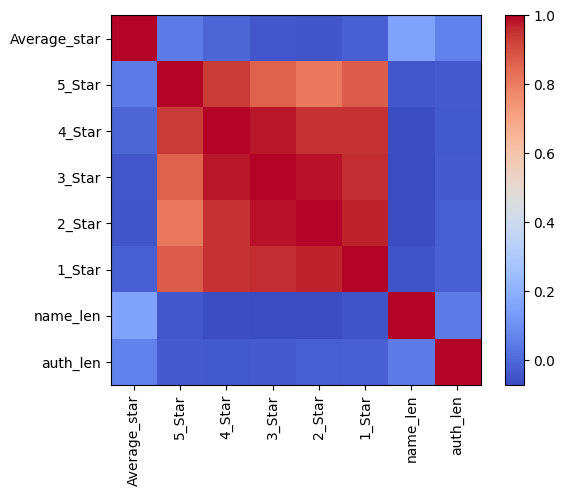

In [33]:
df = df.nlargest(5000, 'Average_star')
df['name_len'] = df['Book_Name'].str.len()
df['auth_len'] = df['Author'].str.len()


sums = {}
# Convert the 'numbers' column to numeric values
for s in ['5_Star', '4_Star', '3_Star', '2_Star', '1_Star']:
    df[s] = pd.to_numeric(df[s].str.replace(',', ''), errors='coerce')
    sums[s] = df[s].sum()

print(df.describe())
cols = list(df.columns)

corr_matrix = df.corr()

# Create the heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add xticks and yticks
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

# Show the plot
plt.show()

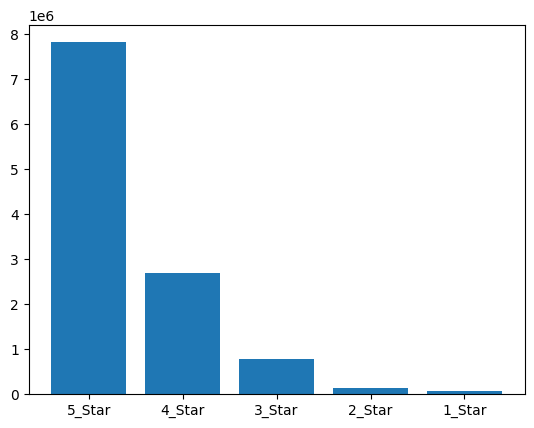

In [26]:
# plot number of stars given
fig, ax = plt.subplots()
ax.bar(sums.keys(), sums.values())
plt.show()

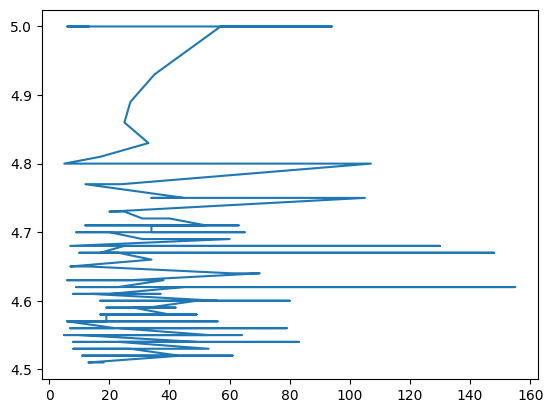

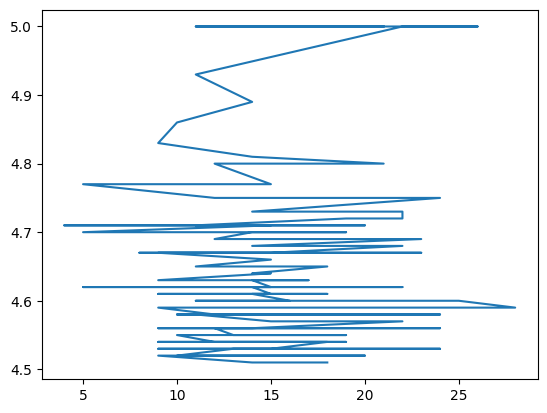

In [27]:
# plot number of stars given
fig, ax = plt.subplots()
ax.plot(df['name_len'], df['Average_star'])
plt.show()

fig, ax = plt.subplots()
ax.plot(df['auth_len'], df['Average_star'])
plt.show()

In [7]:
# total number of stars...
df['sum_star'] = df[['5_Star', '4_Star', '3_Star', '2_Star', '1_Star']].sum(axis=1)

In [8]:
# Group the DataFrame by the 'Name' column and calculate the mean salary
star_grouped = df.groupby('5_Star')


In [ ]:
count_5 = df['5_Star'].value_counts()
fig, ax = plt.subplots()
ax.bar(df['Average_star'], df['5_Star'])

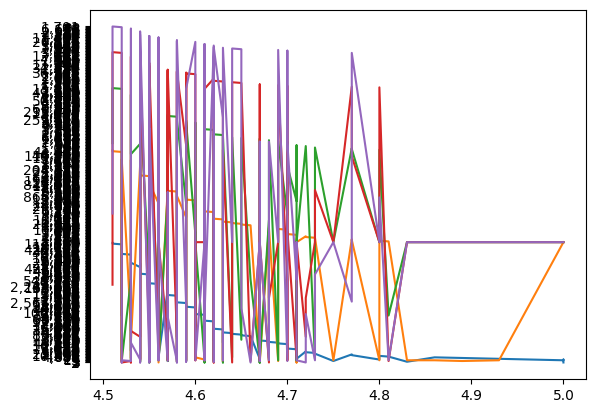

In [8]:
# plotting word frequency
fig, ax = plt.subplots()
ax.plot(df['Average_star'], df['5_Star'])
ax.plot(df['Average_star'], df['4_Star'])
ax.plot(df['Average_star'], df['3_Star'])
ax.plot(df['Average_star'], df['2_Star'])
ax.plot(df['Average_star'], df['1_Star'])


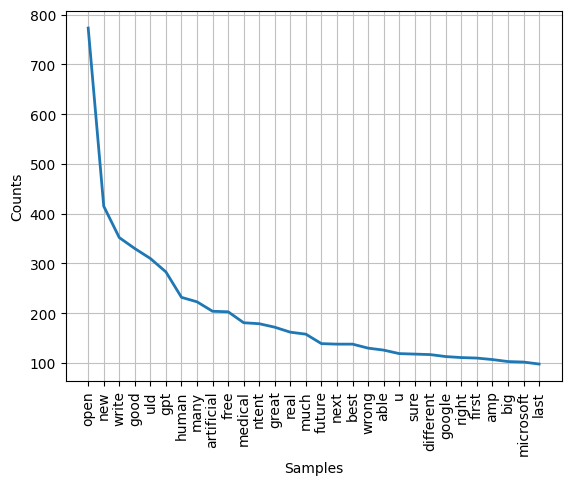

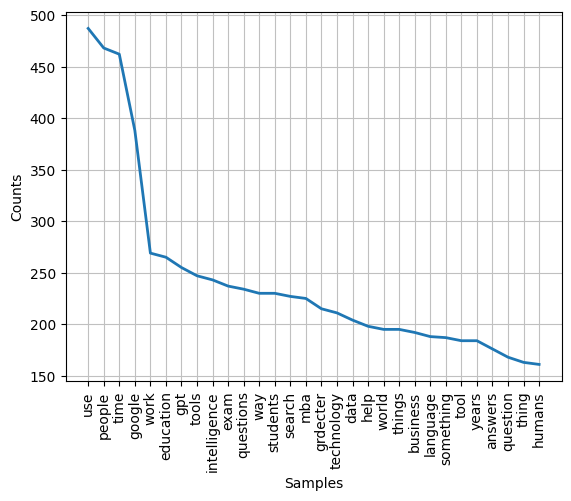

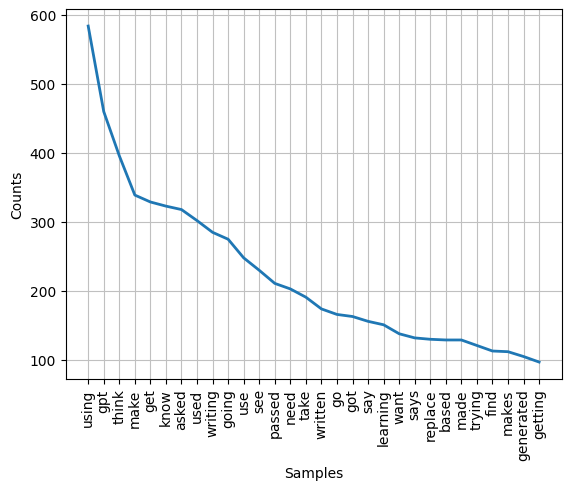

In [29]:
# tagging tokens and plotting Nouns, verbs, and adjectives
pos_tags = nltk.pos_tag(cleaned_tokens)
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]

for wt in [adjectives, nouns, verbs]:
    dist = FreqDist(wt)
    dist.plot(30, cumulative=False)
    plt.show()